# Project: No Show Appointment (A Database From Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I investigated a database of medical appointment records in Brazil to try to predict the liklihood of patients showing up for their scheduled appointment. The database is a part of the original database available online on <a href="https://www.kaggle.com/joniarroba/noshowappointments">Kaggle</a>.
This dataset contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
### Data Dictionary
<ul>
<li>PatientId : Identification of a patient
<li>AppointmentID : Identification of each appointment 
<li>Gender : Male or Female 
<li>ScheduleDay = The day of the actuall appointment, when they have to visit the doctor.
<li>AppointmentDay = The day someone called or registered the appointment, this is before appointment of course.
<li>Age = How old is the patient
<li>Neighbourhood = Where the appointment takes place
<li>Scholarship = Ture of False (Indicates whether or not the patient is enrolled in Brasilian welfare program)
<li>Hipertension = True or False
<li>Diabetes = True or False
<li>Alcoholism = True or False
<li>Handcap = True or False
<li>SMS_received = 1 or more messages sent to the patient
<li>No-show = True or False. 


The questions I am trying to answer here are: 1) how does gender, hadcap, and scholarship relate to the liklihood of patients not showing up for their appoitment. The dependant variable is the no-show column and I chose the independent varibales to be gae, gender, hadcap, and scholarship. 

<a id='wrangling'></a>
## Data Wrangling

### 1. Loading Libraries

In [423]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import seaborn as sns
% matplotlib inline


### 2. General Properties

Below, we load the .csv file into the df dataframe. Here we take a look at some general information about the data such as number of rows and columns, number of NaN values in each colum, first couple of rows, data type of each column, and some statistics about each column

In [424]:
# load data, see fisrt couple of rows
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv') 

In [425]:
# see the number of rows and columns 
df.shape

(110527, 14)

In [426]:
# see the first 5 rows
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [427]:
# statistics for each column
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [428]:
# see the data type and numver of NaN values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### 3. Correcting Data Inconsistencies 

Below we will perform our data cleaning:
<ol>
    <li> Change the column names to all lower case for easier handeling.</li>
    <li> Create a new column to show no_show values numerically.</li>
    <li> There are no missing data so no need to drop any NaN values.</li>
    <li> Change data type for ScheduledDay and AppointmentDay to DateTime</li>
    <li> Remove time from ScheduledDay and AppointmentDay</li>
    <li> Drop PatientId and AppointmentID.</li>
</ol>

In [429]:
# rename columns for easier handeling
df.rename(index=str, columns=lambda x: x.strip().lower().replace('-','_'), inplace=True)
df.head(0)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [430]:
# add a col that represents no_show numerically
df['show']=pd.Series(np.where(df['no_show'].values == 'Yes', 0, 1),df.index);
df.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,1


In [431]:
# change data type for ScheduledDay and AppointmentDay to DateTime
df['scheduledday']= pd.to_datetime(df['scheduledday']).apply(lambda x: x.date())
df['appointmentday']= pd.to_datetime(df['appointmentday']).apply(lambda x: x.date())
df.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1


In [432]:
df=df[df.columns[2:]]
df.head(0)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,show


### 4. Cleaning Data

In [433]:
# take a look at unique values 
print('gender: {}'.format(df.gender.unique()))
print('scholarship: {}'.format(df.scholarship.unique()))
print('hipertension: {}'.format(df.hipertension.unique()))
print('scholarship: {}'.format(df.scholarship.unique()))
print('diabetes: {}'.format(df.diabetes.unique()))
print('handcap: {}'.format(df.handcap.unique()))
print('sms_received: {}'.format(df.sms_received.unique()))
print('show: {}'.format(df.show.unique()))
print('neighbourhood: {}'.format(df.neighbourhood.unique()))

gender: ['F' 'M']
scholarship: [0 1]
hipertension: [1 0]
scholarship: [0 1]
diabetes: [0 1]
handcap: [0 1 2 3 4]
sms_received: [0 1]
show: [1 0]
neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 

Except for 'handcap' & 'neighbourhood', all other columns have two values. The max value for Handcap, based on description given for this column, different levels of disabilities are recorded with different values with 4 having 4 disabilities. Next, we take a look at the values for the age column to make sure there are error such as negative values. We also take a look at the percentile for the age column and bin the age into different age groups. 

Based on the information above, we can see that the dependent variable is "no_show" and the independent variables are "gender", "scholarship", "hipertension", "scholarship", "diabetes", "handcap", "sms_received", "show", "neighbourhood".

In [434]:
# check how many age < 0
df[df['age']< 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,show
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,1


There is only one negative value which we will drop below:

In [435]:
# drop rows with age <0 and check succussful drop
df = df[df['age'] >= 0]
df[df['age']< 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,show


In [436]:
# view the min, 25%, 50%, 75%, max age to bin the age column
df.describe()['age']
# bin edges that will be used to "cut" the data into groups
bin_edges = [ 0,19,35 ,50,70,115 ] 
# labels for the four acidity level groups
bin_names = ['0-19' ,'20-35' ,'35-50' ,'50-70','>70' ] # Name each acidity level category
# creates age_levels column
df['age_levels'] = pd.cut(df['age'], bin_edges, labels=bin_names)
# checks for successful creation of this column
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,show,age_levels
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,50-70
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,50-70
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,50-70
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0-19
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,50-70


<a id='eda'></a>
## Exploratory Data Analysis

### 1. General Ploting and Visualization
Below we take a look at the histogram for all columns with numerical data. 

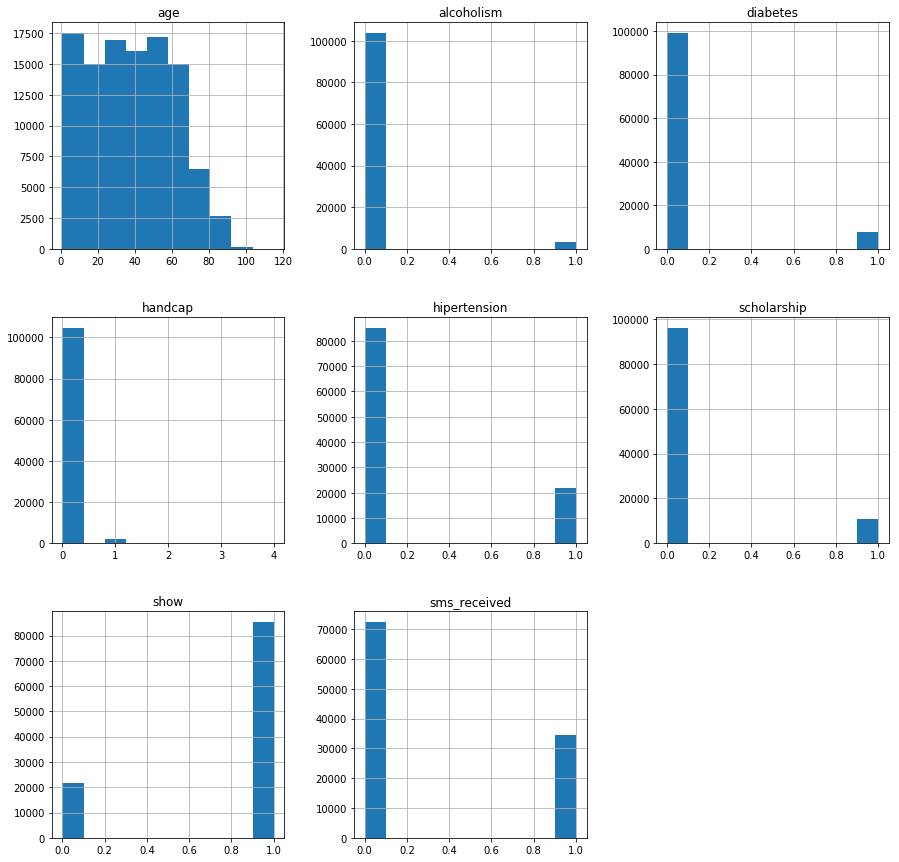

In [281]:
df.hist(figsize = (15,15));

In [506]:
no_show_up_rate=df.groupby('show').count()['age']/df.count()['age'];
no_show_up_rate

show
0    0.201934
1    0.798066
Name: age, dtype: float64

From information above, about 20% of all patients miss their appointments. In the following section, we try to determine if there is a correlation between no show_up rate and other medical records.

### 2. Does gender have an affect on the no-show-up rate?

Let's first take a look at the number of females and males in our dataset.

In [342]:
# create a mask for show and no-show cases to retreive data easily
showed = df.show ==1
notshowed = df.show ==0

In [347]:
# check to see if gender is associated with showing up to the appointment
df.groupby('gender').count()['age']
# data is skewed so to accurately determine the correlation between show-up, we have to associate the proportion

gender
F    70118
M    36869
Name: age, dtype: int64

Basesd on the data above, we see that the number of females are a lot higher than males. We have to take this into account when calculating the percentage of no-show for these groups. Below we find the percentage of no-show for the female and male groups.

In [353]:
# percentage of no-show for females and males
no_show_perc=[]
no_show_perc.append(df[(df.gender == 'F') &  (notshowed)].count()['age']/df.groupby('gender').count()['age'][0])
no_show_perc.append(df[(df.gender == 'M') &  (notshowed)].count()['age']/df.groupby('gender').count()['age'][1])
no_show_perc

[0.20358538463732564, 0.20084623938810384]

In [354]:
# percentage of show for females and males
show_perc=[]
show_perc.append(df[(df.gender == 'F') &  (showed)].count()['age']/df.groupby('gender').count()['age'][0])
show_perc.append(df[(df.gender == 'M') &  (showed)].count()['age']/df.groupby('gender').count()['age'][1])
show_perc

[0.7964146153626743, 0.7991537606118961]

In [355]:
df.groupby('gender').count()['age'][1]

36869

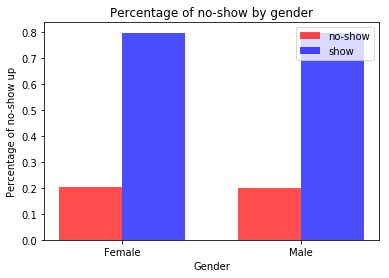

In [356]:

ind = np.arange(len(female_perc))  # the x locations for the groups
width = 0.35       # the width of the bars


# plot bars
red_bars = plt.bar(ind, no_show_perc, width, color='r', alpha=.7, label='no-show')
white_bars = plt.bar(ind + width, show_perc, width, color='b', alpha=.7, label='show')

# title and labels
plt.ylabel('Percentage of no-show up')
plt.xlabel('Gender')
plt.title('Percentage of no-show by gender')
locations = ind + width / 2  # xtick locations
labels = ['Female','Male']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();


From the plot above, we can see that female patients booked more appointment compared to male patients. By the first look, we may assume that females have a higher chance of not showing up for their appoitments. However, both groups had very similar values for the the percentage of no-show appointments. Therefore, gender may not have a significant affect on no-show appointments. 

### 3. Is there an association between age and no-show-up rate?

Here, we take a look at the percentage of no-show appointments among the different age groups that we binned earlier. We would like to know if a certain group have a higher chance of no-show appointment. First, we take a look at the number of patients in each age group. Next, we calcualte the percentage of no-show appointments for each group.

In [287]:
df.groupby('age_levels').count()['age']

age_levels
0-19     26872
20-35    22592
35-50    22100
50-70    26850
>70       8573
Name: age, dtype: int64

In [357]:
# percentage of no-show for different age groups
no_show_perc=[]
for bin in bin_names:
    no_show_perc.append(df[(df.age_levels == bin) &  (notshowed)].count()['age_levels'])
no_show_perc=no_show_perc/df.groupby('age_levels').count()['age']
list(no_show_perc)

[0.22707651086632927,
 0.2372078611898017,
 0.2032579185520362,
 0.16271880819366852,
 0.1584042925463665]

In [358]:
# percentage of show for different age groups
show_perc=[]
for bin in bin_names:
    show_perc.append(df[(df.age_levels == bin) &  (showed)].count()['age_levels'])
show_perc=show_perc/df.groupby('age_levels').count()['age']
list(show_perc)

[0.7729234891336707,
 0.7627921388101983,
 0.7967420814479638,
 0.8372811918063314,
 0.8415957074536335]

In [359]:
df.age_levels.unique()

[50-70, 0-19, >70, 20-35, 35-50]
Categories (5, object): [0-19 < 20-35 < 35-50 < 50-70 < >70]

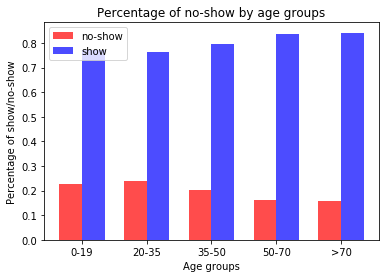

In [360]:
ind = np.arange(len(no_show_perc))  # the x locations for the groups
width = 0.35       # the width of the bars


# plot bars
red_bars = plt.bar(ind, no_show_perc, width, color='r', alpha=.7, label='no-show')
white_bars = plt.bar(ind + width, show_perc, width, color='b', alpha=.7, label='show')

# title and labels
plt.ylabel('Percentage of show/no-show')
plt.xlabel('Age groups')
plt.title('Percentage of no-show by age groups')
locations = ind + width / 2  # xtick locations
labels = ['0-19', '20-35', '35-50','50-70', '>70']# xtick labels
plt.xticks(locations, labels)
# legend
plt.legend();


From the above visualization, we can see that patients with age > 50 had a chance of showing up for the appoitments than other groups. So for a prediction model, age could be a good feature. 

### 4. Is there an association between scholarship and no-show-up rate?

Here, we take a look at the percentage of no-show appointments among people who received and not received scholarship. First, we take a look at the number of patients in each group. Next, we calcualte the percentage of no-show appointments for each group.

In [363]:
# check to see if number of patients who received scholarship
df.groupby('scholarship').count()['age'] 

scholarship
0    96178
1    10809
Name: age, dtype: int64

In [367]:
scholarship_show=df.groupby('scholarship').count()['age']/df.count()['age']
scholarship_show

scholarship
0    0.898969
1    0.101031
Name: age, dtype: float64

In [361]:
# percentage of no-show for females and males
no_show_perc=[]
no_show_perc.append(df[(df.scholarship == 1) &  (notshowed)].count()['age']/df.groupby('scholarship').count()['age'][1])
no_show_perc.append(df[(df.scholarship == 0) &  (notshowed)].count()['age']/df.groupby('scholarship').count()['age'][0])
no_show_perc

# percentage of show for females and males
show_perc=[]
show_perc.append(df[(df.scholarship == 1) &  (showed)].count()['age']/df.groupby('scholarship').count()['age'][1])
show_perc.append(df[(df.scholarship == 0) &  (showed)].count()['age']/df.groupby('scholarship').count()['age'][0])
show_perc

[0.7621426588953649, 0.8013163093430931]

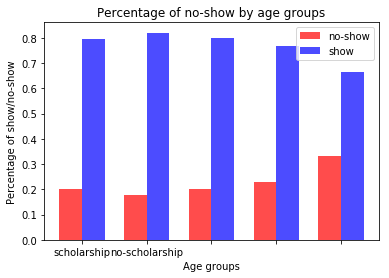

In [388]:
ind = np.arange(len(no_show_perc))  # the x locations for the groups
width = 0.35       # the width of the bars


# plot bars
red_bars = plt.bar(ind, no_show_perc, width, color='r', alpha=.7, label='no-show')
white_bars = plt.bar(ind + width, show_perc, width, color='b', alpha=.7, label='show')

# title and labels
plt.ylabel('Percentage of show/no-show')
plt.xlabel('Age groups')
plt.title('Percentage of no-show by age groups')
locations = ind + width / 2  # xtick locations
labels = ['scholarship', 'no-scholarship']# xtick labels
plt.xticks(locations, labels)
# legend
plt.legend();

From the above visualization, we can see that about 10% of all patients received scholarship among which about 76% kept their appointments. On the other hand about 90% of did noy receive scholarship and about 80% kept their appointments. Therefore we can say that there is an association between scholarshio and no-show-up and can help as a feature in a predictive model.

### 5. Is there an association between handcap and no-show-up rate?

Here, we take a look at the percentage of no-show appointments among people who are handicap. There are four handicap group and as before, we should take into account the number of patients in each handicap group. Next, we calcualte the percentage of no-show appointments for each group.

In [383]:
show_perc=df[showed].groupby(['handcap']).count()['age'] /df.groupby('handcap').count()['age'] 
show_perc

handcap
0    0.796911
1    0.820676
2    0.797814
3    0.769231
4    0.666667
Name: age, dtype: float64

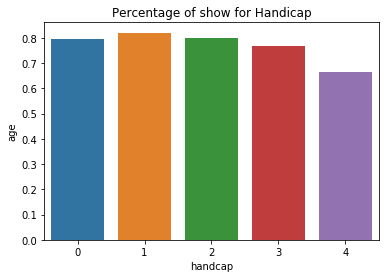

In [387]:
ax = sns.barplot(x=show_perc.index, y=show_perc)
ax.set_title("Percentage of show for Handicap")
plt.show()

In [384]:
no_show_perc=df[notshowed].groupby(['handcap']).count()['age'] /df.groupby('handcap').count()['age'] 
no_show_perc


handcap
0    0.203089
1    0.179324
2    0.202186
3    0.230769
4    0.333333
Name: age, dtype: float64

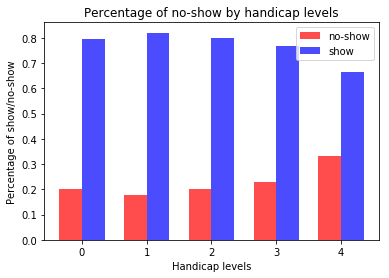

In [385]:
no_show_perc=df[notshowed].groupby(['handcap']).count()['age'] /df.groupby('handcap').count()['age'] 
no_show_perc
ind = np.arange(len(no_show_perc))  # the x locations for the groups
width = 0.35       # the width of the bars


# plot bars
red_bars = plt.bar(ind, no_show_perc, width, color='r', alpha=.7, label='no-show')
white_bars = plt.bar(ind + width, show_perc, width, color='b', alpha=.7, label='show')

# title and labels
plt.ylabel('Percentage of show/no-show')
plt.xlabel('Handicap levels')
plt.title('Percentage of no-show by handicap levels')
locations = ind + width / 2  # xtick locations
labels = ['0', '1','2','3','4']# xtick labels
plt.xticks(locations, labels)
# legend
plt.legend();

From the above visualization, we can see that there is definitely an association between hanicap and no show-up appointments. The first plot shows that the percentage show-up appointment drops with increasing handicap level. Therefore this feature may help in determining if a patient will or will not show up for their appointement. 

### 6. Is there an association between alcoholism and no-show-up rate?

Here, we take a look at the percentage of no-show appointments among people who are alcoholic. There are two groups (alcoholic =1 and non-alcoholic =0) and as before, we should take into account the number of patients in each group. Next, we calcualte the percentage of no-show appointments for each group.

In [389]:
show_perc=df[showed].groupby(['alcoholism']).count()['age'] /df.groupby('alcoholism').count()['age'] 
show_perc

alcoholism
0    0.797321
1    0.798512
Name: age, dtype: float64

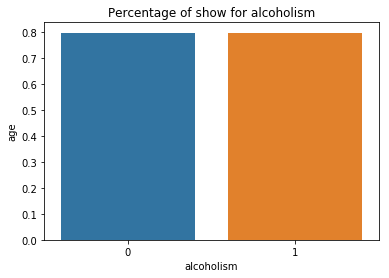

In [390]:
ax = sns.barplot(x=show_perc.index, y=show_perc)
ax.set_title("Percentage of show for alcoholism")
plt.show()

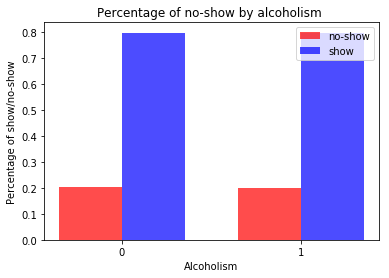

In [392]:
no_show_perc=df[notshowed].groupby(['alcoholism']).count()['age'] /df.groupby('alcoholism').count()['age'] 
no_show_perc
ind = np.arange(len(no_show_perc))  # the x locations for the groups
width = 0.35       # the width of the bars


# plot bars
red_bars = plt.bar(ind, no_show_perc, width, color='r', alpha=.7, label='no-show')
white_bars = plt.bar(ind + width, show_perc, width, color='b', alpha=.7, label='show')

# title and labels
plt.ylabel('Percentage of show/no-show')
plt.xlabel('Alcoholism')
plt.title('Percentage of no-show by alcoholism ')
locations = ind + width / 2  # xtick locations
labels = ['0', '1']# xtick labels
plt.xticks(locations, labels)
# legend
plt.legend();

From the above visualization, we can see that the show-up rate for patients with and without alcoholism is about the same. Therefore, this may not be a helpful feature in a predictive model to determine the liklihood of show-up for a patient. 

### 7. Is there an association between diabetes and no-show-up rate?

Here, we take a look at the percentage of no-show appointments among people who are alcoholic. There are two groups (alcoholic =1 and non-alcoholic =0) and as before, we should take into account the number of patients in each group. Next, we calcualte the percentage of no-show appointments for each group.

In [394]:
df.groupby(['diabetes']).count()['age'] /df.count()['age']

diabetes
0    0.925757
1    0.074243
Name: age, dtype: float64

In [396]:
df.groupby(['diabetes','show']).count()['age'] /df.groupby('diabetes').count()['age'] 

diabetes  show
0         0       0.204455
          1       0.795545
1         0       0.180033
          1       0.819967
Name: age, dtype: float64

Similar to our analysis before, we can see that less than 10% of all patients had diebetes from which about 82% showed up to their appointment and about 92% had diebetes from with about 80% showed up to their appointment. Therefore we can say that there is an association between diebetes and no-show-up and can help as a feature in a predictive model.

### 8. Is there an association between sms-received and no-show-up rate?

Here, we take a look at the percentage of no-show appointments among people who received sms vs. who didnt. There are two groups (sms-received =1 and not-received =0) and as before, we should take into account the number of patients in each group. Next, we calcualte the percentage of no-show appointments for each group.

In [397]:
df.groupby(['sms_received']).count()['age'] /df.count()['age']

sms_received
0    0.676736
1    0.323264
Name: age, dtype: float64

In [399]:
show_perc=df[showed].groupby(['sms_received']).count()['age'] /df.groupby('sms_received').count()['age'] 
show_perc

sms_received
0    0.832712
1    0.723348
Name: age, dtype: float64

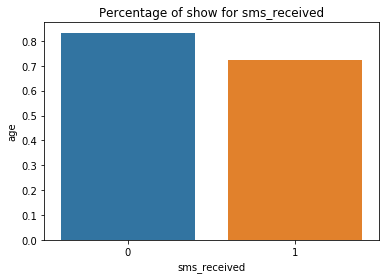

In [400]:
ax = sns.barplot(x=show_perc.index, y=show_perc)
ax.set_title("Percentage of show for sms_received")
plt.show()

In [401]:
df.groupby(['sms_received','show']).count()['age'] /df.groupby('sms_received').count()['age'] 

sms_received  show
0             0       0.167288
              1       0.832712
1             0       0.276652
              1       0.723348
Name: age, dtype: float64

Similar to our analysis before, we can see that less than 68% of all patients did not received an sms from which about 83% showed up to their appointment and about 32% received an sms from which about 72% showed up to their appointment. Therefore we can say that there is an association between sms_received and no-show-up and can help as a feature in a predictive model.

<a id='conclusions'></a>
## Conclusions

In this report, we investigated the correlation between no show-up appointments and several features from a database of medical records in Brazil. Based on the data, about 20% of all patients did not show up for their appointments. We investigated the correlation between no show-up rate and other features provided in the medical records. 

Based on our EDA, the folowing features seem to have correlation with the patients' show-up rate: age, sms_received, alcoholism, diebetes, hanicap and scholarship. Gender did not seem to have a big affect of the show-up rate.
